In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
# Load the features from the CSV file
df = pd.read_csv(r'Original_Features6.csv')
df

,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,English Type
0,0.464441,1348.509341,1625.523338,2463.170509,0.035927,-351.79230,147.745390,19.917744,31.775644,23.516031,2.070087,9.844380,0.265172,-2.338450,-1.322878,-9.483175,-1.679585,-0.177087,0
1,0.466245,3418.700579,3223.002127,6119.662553,0.107384,-410.52670,125.953590,-20.461075,17.156311,-6.669661,15.239104,-16.752926,-3.614888,-5.258536,-7.771095,-2.448791,-5.192124,-2.269287,0
2,0.378031,4684.841227,4088.115737,8508.831711,0.141358,-342.62964,78.433655,12.540177,31.937393,-2.213818,15.747808,-39.245610,-5.218530,-16.471539,-5.059716,-14.047500,-2.351587,-14.914782,0
3,0.395282,2946.916209,2521.878443,5498.743879,0.099481,-331.50244,108.531410,-21.552880,42.042065,-4.467168,9.407474,1.117538,-26.776285,-9.033010,-18.285458,5.542378,1.801108,-12.343457,1
4,0.526733,3757.551713,4111.206588,7823.569504,0.072146,-306.30480,105.473820,-2.033697,33.645050,19.767216,14.690701,-7.823933,16.233910,1.511278,-1.097624,-4.256559,5.822567,-5.417769,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2133,0.371023,1633.642552,1746.544797,3167.257783,0.047966,-367.42440,153.012450,-6.412210,19.019106,17.933186,-5.957310,-0.477651,-18.703012,-15.582651,-1.840943,-12.552829,-8.802483,-3.864208,1
2134,0.541542,2592.552565,2935.536542,4859.888606,0.058054,-321.66678,128.274500,-3.335473,28.203968,15.083783,16.396720,4.090911,10.306094,2.037651,0.225633,1.150143,1.580174,-2.241047,0
2135,0.407605,4251.225723,4175.493197,8868.443411,0.104116,-253.21036,93.182236,9.850489,38.595917,-14.542635,16.471262,-13.102000,20.879627,-8.502631,6.002625,12.753398,2.869624,-1.761060,0
2136,0.483206,2043.299739,1943.271121,3852.628262,0.067764,-322.13104,150.674900,-11.696100,24.301128,10.992788,-7.354234,20.903921,-4.221878,-11.789002,8.365523,-4.948959,-10.440193,-3.944272,0


In [3]:
X = df.iloc[:,0:18]
y = df.iloc[:,18]


In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,y_train.shape)

# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)


(1710, 18) (1710,)


In [5]:
# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
# Define the autoencoder architecture
input_dim = X_train_scaled.shape[1]
encoding_dim = 64
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='rmsprop', loss='mse')

# Train the autoencoder
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=1500, batch_size=32,
                validation_data=(X_test_scaled, X_test_scaled))

# Extract the encoded representations
encoder = Model(inputs=input_layer, outputs=encoder)
X_train_encoded = encoder.predict(X_train_scaled)
X_test_encoded = encoder.predict(X_test_scaled)


Epoch 1/1500
54/54 [==============================] - 1s 4ms/step - loss: 1.0356 - val_loss: 0.9171
Epoch 2/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.8268 - val_loss: 0.7869
Epoch 3/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.7379 - val_loss: 0.7293
Epoch 4/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.6953 - val_loss: 0.6972
Epoch 5/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.6691 - val_loss: 0.6752
Epoch 6/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.6506 - val_loss: 0.6585
Epoch 7/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.6365 - val_loss: 0.6455
Epoch 8/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.6258 - val_loss: 0.6351
Epoch 9/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.6173 - val_loss: 0.6265
Epoch 10/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.6105 - val_loss: 0.6200

54/54 [==============================] - 0s 2ms/step - loss: 0.5792 - val_loss: 0.5895
Epoch 83/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5791 - val_loss: 0.5895
Epoch 84/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5791 - val_loss: 0.5894
Epoch 85/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5791 - val_loss: 0.5895
Epoch 86/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5791 - val_loss: 0.5895
Epoch 87/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5791 - val_loss: 0.5894
Epoch 88/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5791 - val_loss: 0.5894
Epoch 89/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5790 - val_loss: 0.5895
Epoch 90/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5790 - val_loss: 0.5894
Epoch 91/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5790 - val_loss: 0.5894
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.5784 - val_loss: 0.5889
Epoch 163/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5784 - val_loss: 0.5888
Epoch 164/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5784 - val_loss: 0.5888
Epoch 165/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5784 - val_loss: 0.5888
Epoch 166/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5784 - val_loss: 0.5888
Epoch 167/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5784 - val_loss: 0.5888
Epoch 168/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5784 - val_loss: 0.5888
Epoch 169/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5784 - val_loss: 0.5888
Epoch 170/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5784 - val_loss: 0.5888
Epoch 171/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5784 - val_loss: 0.

54/54 [==============================] - 0s 2ms/step - loss: 0.5781 - val_loss: 0.5885
Epoch 243/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5781 - val_loss: 0.5885
Epoch 244/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5781 - val_loss: 0.5885
Epoch 245/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5781 - val_loss: 0.5885
Epoch 246/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5781 - val_loss: 0.5885
Epoch 247/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5781 - val_loss: 0.5885
Epoch 248/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5781 - val_loss: 0.5885
Epoch 249/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5781 - val_loss: 0.5885
Epoch 250/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5781 - val_loss: 0.5885
Epoch 251/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5781 - val_loss: 0.

54/54 [==============================] - 0s 2ms/step - loss: 0.5779 - val_loss: 0.5882
Epoch 323/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5779 - val_loss: 0.5882
Epoch 324/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5779 - val_loss: 0.5882
Epoch 325/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5779 - val_loss: 0.5883
Epoch 326/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5779 - val_loss: 0.5882
Epoch 327/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5779 - val_loss: 0.5882
Epoch 328/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5779 - val_loss: 0.5882
Epoch 329/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5779 - val_loss: 0.5883
Epoch 330/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5779 - val_loss: 0.5882
Epoch 331/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5779 - val_loss: 0.

54/54 [==============================] - 0s 2ms/step - loss: 0.5778 - val_loss: 0.5881
Epoch 403/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5778 - val_loss: 0.5881
Epoch 404/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5778 - val_loss: 0.5881
Epoch 405/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5778 - val_loss: 0.5881
Epoch 406/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5778 - val_loss: 0.5881
Epoch 407/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5778 - val_loss: 0.5881
Epoch 408/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5778 - val_loss: 0.5880
Epoch 409/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5778 - val_loss: 0.5881
Epoch 410/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5778 - val_loss: 0.5881
Epoch 411/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5778 - val_loss: 0.

54/54 [==============================] - 0s 2ms/step - loss: 0.5777 - val_loss: 0.5880
Epoch 483/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5777 - val_loss: 0.5880
Epoch 484/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5777 - val_loss: 0.5879
Epoch 485/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5777 - val_loss: 0.5880
Epoch 486/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5777 - val_loss: 0.5879
Epoch 487/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5777 - val_loss: 0.5880
Epoch 488/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5777 - val_loss: 0.5880
Epoch 489/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5777 - val_loss: 0.5880
Epoch 490/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5777 - val_loss: 0.5879
Epoch 491/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5777 - val_loss: 0.

54/54 [==============================] - 0s 2ms/step - loss: 0.5777 - val_loss: 0.5879
Epoch 563/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5777 - val_loss: 0.5879
Epoch 564/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5777 - val_loss: 0.5879
Epoch 565/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5777 - val_loss: 0.5879
Epoch 566/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5777 - val_loss: 0.5878
Epoch 567/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5777 - val_loss: 0.5879
Epoch 568/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5777 - val_loss: 0.5878
Epoch 569/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5777 - val_loss: 0.5879
Epoch 570/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5777 - val_loss: 0.5879
Epoch 571/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5777 - val_loss: 0.

54/54 [==============================] - 0s 2ms/step - loss: 0.5776 - val_loss: 0.5878
Epoch 643/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5776 - val_loss: 0.5878
Epoch 644/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5776 - val_loss: 0.5878
Epoch 645/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5776 - val_loss: 0.5878
Epoch 646/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5776 - val_loss: 0.5878
Epoch 647/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5776 - val_loss: 0.5878
Epoch 648/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5776 - val_loss: 0.5878
Epoch 649/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5776 - val_loss: 0.5878
Epoch 650/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5776 - val_loss: 0.5878
Epoch 651/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5776 - val_loss: 0.

54/54 [==============================] - 0s 2ms/step - loss: 0.5776 - val_loss: 0.5878
Epoch 723/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5776 - val_loss: 0.5877
Epoch 724/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5776 - val_loss: 0.5878
Epoch 725/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5776 - val_loss: 0.5878
Epoch 726/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5776 - val_loss: 0.5878
Epoch 727/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5776 - val_loss: 0.5877
Epoch 728/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5776 - val_loss: 0.5878
Epoch 729/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5776 - val_loss: 0.5878
Epoch 730/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5776 - val_loss: 0.5878
Epoch 731/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5776 - val_loss: 0.

54/54 [==============================] - 0s 2ms/step - loss: 0.5776 - val_loss: 0.5878
Epoch 803/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5776 - val_loss: 0.5878
Epoch 804/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5776 - val_loss: 0.5877
Epoch 805/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5776 - val_loss: 0.5877
Epoch 806/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5776 - val_loss: 0.5877
Epoch 807/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5776 - val_loss: 0.5877
Epoch 808/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5776 - val_loss: 0.5878
Epoch 809/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5776 - val_loss: 0.5877
Epoch 810/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5776 - val_loss: 0.5877
Epoch 811/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5776 - val_loss: 0.

54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 883/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 884/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5776 - val_loss: 0.5877
Epoch 885/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5776 - val_loss: 0.5877
Epoch 886/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 887/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 888/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 889/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 890/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 891/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.

54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 963/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 964/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 965/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 966/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 967/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 968/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 969/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 970/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 971/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.

54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 1043/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 1044/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 1045/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 1046/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 1047/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 1048/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 1049/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 1050/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5876
Epoch 1051/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val

54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 1122/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 1123/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 1124/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 1125/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5876
Epoch 1126/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 1127/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 1128/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 1129/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 1130/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val

54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 1201/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 1202/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 1203/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5876
Epoch 1204/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 1205/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 1206/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5876
Epoch 1207/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 1208/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 1209/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val

54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5876
Epoch 1280/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5876
Epoch 1281/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 1282/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5876
Epoch 1283/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5876
Epoch 1284/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5876
Epoch 1285/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5876
Epoch 1286/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 1287/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5876
Epoch 1288/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val

54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 1359/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5876
Epoch 1360/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 1361/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 1362/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5876
Epoch 1363/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 1364/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5876
Epoch 1365/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5876
Epoch 1366/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5876
Epoch 1367/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val

54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5876
Epoch 1438/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5876
Epoch 1439/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5876
Epoch 1440/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5876
Epoch 1441/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5876
Epoch 1442/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5876
Epoch 1443/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5876
Epoch 1444/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5876
Epoch 1445/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5876
Epoch 1446/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val

In [7]:
#Train a classifier
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train_encoded, y_train)

# Evaluate the performance
y_pred = clf.predict(X_test_encoded)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
print("F1-score: ", f1_score(y_test, y_pred, average='weighted'))


import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, classification_report
import warnings

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy:  0.8177570093457944
Precision:  0.6687265263341776
Recall:  0.8177570093457944
F1-score:  0.7357710881003291
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       350
           1       0.00      0.00      0.00        78

    accuracy                           0.82       428
   macro avg       0.41      0.50      0.45       428
weighted avg       0.67      0.82      0.74       428



In [8]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


model = XGBClassifier()
history = model.fit(X_train_encoded, y_train)
#print(model)

y_pred = model.predict(X_test_encoded)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 80.61%


In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, classification_report
import warnings

# Print classification report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.82      0.97      0.89       350
           1       0.35      0.08      0.13        78

    accuracy                           0.81       428
   macro avg       0.59      0.52      0.51       428
weighted avg       0.74      0.81      0.75       428



# CNN

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping

In [11]:
X = df.iloc[:,0:18]
y = df.iloc[:,18]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [12]:
# Convert the accent labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert the accent labels to one-hot vectors
num_classes = len(np.unique(y_train_encoded))
y_train_onehot = to_categorical(y_train_encoded, num_classes)
y_test_onehot = to_categorical(y_test_encoded, num_classes)

# Reshape the input features for the CNN
n_timesteps, n_features = X_train.shape[1], 1
X_train_reshaped = X_train.values.reshape((X_train.shape[0], n_timesteps, n_features))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], n_timesteps, n_features))


In [13]:
# Define the CNN architecture
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])



In [14]:
# Train the CNN
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(X_train_reshaped, y_train_onehot, epochs=1500, batch_size=32,
                    validation_data=(X_test_reshaped, y_test_onehot))


Epoch 1/1500
47/47 [==============================] - 1s 7ms/step - loss: 52.7050 - accuracy: 0.7139 - val_loss: 1.8352 - val_accuracy: 0.8146
Epoch 2/1500
47/47 [==============================] - 0s 4ms/step - loss: 12.6144 - accuracy: 0.7106 - val_loss: 4.5947 - val_accuracy: 0.8131
Epoch 3/1500
47/47 [==============================] - 0s 5ms/step - loss: 4.9439 - accuracy: 0.7066 - val_loss: 0.6385 - val_accuracy: 0.7944
Epoch 4/1500
47/47 [==============================] - 0s 4ms/step - loss: 1.7785 - accuracy: 0.7373 - val_loss: 0.5355 - val_accuracy: 0.8053
Epoch 5/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.9249 - accuracy: 0.7453 - val_loss: 0.4838 - val_accuracy: 0.8100
Epoch 6/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.8654 - accuracy: 0.7861 - val_loss: 0.5007 - val_accuracy: 0.8131
Epoch 7/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.6156 - accuracy: 0.8028 - val_loss: 0.4803 - val_accuracy: 0.8084
Epoc

47/47 [==============================] - 0s 4ms/step - loss: 0.4573 - accuracy: 0.8235 - val_loss: 0.4628 - val_accuracy: 0.8131
Epoch 59/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.4181 - accuracy: 0.8302 - val_loss: 0.4719 - val_accuracy: 0.7944
Epoch 60/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.5439 - accuracy: 0.8155 - val_loss: 0.4654 - val_accuracy: 0.8131
Epoch 61/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.5002 - accuracy: 0.8275 - val_loss: 0.4664 - val_accuracy: 0.8115
Epoch 62/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.5192 - accuracy: 0.8088 - val_loss: 0.6470 - val_accuracy: 0.8131
Epoch 63/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.4352 - accuracy: 0.8295 - val_loss: 0.4620 - val_accuracy: 0.8115
Epoch 64/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.4356 - accuracy: 0.8222 - val_loss: 0.4633 - val_accuracy: 0.8115
Epoch 65/1500

47/47 [==============================] - 0s 4ms/step - loss: 0.4008 - accuracy: 0.8416 - val_loss: 0.4854 - val_accuracy: 0.7913
Epoch 116/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.4015 - accuracy: 0.8349 - val_loss: 0.4698 - val_accuracy: 0.8115
Epoch 117/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.4149 - accuracy: 0.8295 - val_loss: 0.4849 - val_accuracy: 0.8131
Epoch 118/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.4252 - accuracy: 0.8322 - val_loss: 0.4722 - val_accuracy: 0.8115
Epoch 119/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.4022 - accuracy: 0.8316 - val_loss: 0.4768 - val_accuracy: 0.8115
Epoch 120/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.4219 - accuracy: 0.8329 - val_loss: 0.4719 - val_accuracy: 0.8037
Epoch 121/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.3932 - accuracy: 0.8376 - val_loss: 0.4599 - val_accuracy: 0.8053
Epoch 1

Epoch 172/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.3917 - accuracy: 0.8349 - val_loss: 0.4727 - val_accuracy: 0.8037
Epoch 173/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.3915 - accuracy: 0.8382 - val_loss: 0.4677 - val_accuracy: 0.8100
Epoch 174/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.4038 - accuracy: 0.8389 - val_loss: 0.4682 - val_accuracy: 0.8100
Epoch 175/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.3849 - accuracy: 0.8349 - val_loss: 0.4821 - val_accuracy: 0.8084
Epoch 176/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.3911 - accuracy: 0.8336 - val_loss: 0.4943 - val_accuracy: 0.8100
Epoch 177/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.3846 - accuracy: 0.8336 - val_loss: 0.4922 - val_accuracy: 0.8115
Epoch 178/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.3903 - accuracy: 0.8382 - val_loss: 0.4792 - val_accuracy:

Epoch 229/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.3808 - accuracy: 0.8476 - val_loss: 0.4835 - val_accuracy: 0.7913
Epoch 230/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.3780 - accuracy: 0.8429 - val_loss: 0.4892 - val_accuracy: 0.8037
Epoch 231/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.3800 - accuracy: 0.8429 - val_loss: 0.4745 - val_accuracy: 0.8084
Epoch 232/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.3774 - accuracy: 0.8483 - val_loss: 0.4914 - val_accuracy: 0.7866
Epoch 233/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.3627 - accuracy: 0.8476 - val_loss: 0.4893 - val_accuracy: 0.8069
Epoch 234/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.3688 - accuracy: 0.8449 - val_loss: 0.4836 - val_accuracy: 0.7928
Epoch 235/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.3676 - accuracy: 0.8509 - val_loss: 0.4778 - val_accuracy:

Epoch 286/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.3568 - accuracy: 0.8570 - val_loss: 0.4802 - val_accuracy: 0.8006
Epoch 287/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.3674 - accuracy: 0.8476 - val_loss: 0.5025 - val_accuracy: 0.8037
Epoch 288/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.3548 - accuracy: 0.8556 - val_loss: 0.5138 - val_accuracy: 0.8115
Epoch 289/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.3721 - accuracy: 0.8476 - val_loss: 0.4858 - val_accuracy: 0.8146
Epoch 290/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.3696 - accuracy: 0.8489 - val_loss: 0.4798 - val_accuracy: 0.8115
Epoch 291/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.3584 - accuracy: 0.8556 - val_loss: 0.5019 - val_accuracy: 0.7819
Epoch 292/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.3798 - accuracy: 0.8463 - val_loss: 0.4742 - val_accuracy:

Epoch 343/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.3474 - accuracy: 0.8449 - val_loss: 0.5130 - val_accuracy: 0.7991
Epoch 344/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.3729 - accuracy: 0.8556 - val_loss: 0.5042 - val_accuracy: 0.7944
Epoch 345/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.3828 - accuracy: 0.8516 - val_loss: 0.5221 - val_accuracy: 0.8084
Epoch 346/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.3582 - accuracy: 0.8543 - val_loss: 0.4979 - val_accuracy: 0.8084
Epoch 347/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.3493 - accuracy: 0.8549 - val_loss: 0.4981 - val_accuracy: 0.8037
Epoch 348/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.3555 - accuracy: 0.8476 - val_loss: 0.4990 - val_accuracy: 0.8084
Epoch 349/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.3519 - accuracy: 0.8556 - val_loss: 0.4862 - val_accuracy:

Epoch 400/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.3708 - accuracy: 0.8476 - val_loss: 0.5219 - val_accuracy: 0.8084
Epoch 401/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.3549 - accuracy: 0.8563 - val_loss: 0.5376 - val_accuracy: 0.7913
Epoch 402/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.3337 - accuracy: 0.8583 - val_loss: 0.5195 - val_accuracy: 0.7975
Epoch 403/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.3382 - accuracy: 0.8643 - val_loss: 0.5634 - val_accuracy: 0.7960
Epoch 404/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.3553 - accuracy: 0.8543 - val_loss: 0.5117 - val_accuracy: 0.7960
Epoch 405/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.3462 - accuracy: 0.8630 - val_loss: 0.5290 - val_accuracy: 0.7726
Epoch 406/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.3320 - accuracy: 0.8670 - val_loss: 0.5983 - val_accuracy:

Epoch 457/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.3478 - accuracy: 0.8656 - val_loss: 0.5297 - val_accuracy: 0.7788
Epoch 458/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.3432 - accuracy: 0.8610 - val_loss: 0.5348 - val_accuracy: 0.8037
Epoch 459/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.3297 - accuracy: 0.8710 - val_loss: 0.5878 - val_accuracy: 0.7975
Epoch 460/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.3268 - accuracy: 0.8596 - val_loss: 0.5519 - val_accuracy: 0.7897
Epoch 461/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.3625 - accuracy: 0.8603 - val_loss: 0.5376 - val_accuracy: 0.7819
Epoch 462/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.3363 - accuracy: 0.8656 - val_loss: 0.5302 - val_accuracy: 0.7960
Epoch 463/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.3410 - accuracy: 0.8549 - val_loss: 0.5811 - val_accuracy:

Epoch 514/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.3172 - accuracy: 0.8703 - val_loss: 0.5468 - val_accuracy: 0.8084
Epoch 515/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.3283 - accuracy: 0.8576 - val_loss: 0.5333 - val_accuracy: 0.7928
Epoch 516/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.3293 - accuracy: 0.8583 - val_loss: 0.5530 - val_accuracy: 0.8022
Epoch 517/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.3286 - accuracy: 0.8676 - val_loss: 0.5840 - val_accuracy: 0.7570
Epoch 518/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.3508 - accuracy: 0.8570 - val_loss: 0.5453 - val_accuracy: 0.8022
Epoch 519/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.3626 - accuracy: 0.8703 - val_loss: 0.5892 - val_accuracy: 0.8037
Epoch 520/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.3368 - accuracy: 0.8576 - val_loss: 0.5555 - val_accuracy:

Epoch 571/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.3142 - accuracy: 0.8783 - val_loss: 0.5584 - val_accuracy: 0.7928
Epoch 572/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.3307 - accuracy: 0.8676 - val_loss: 0.5502 - val_accuracy: 0.8022
Epoch 573/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.3294 - accuracy: 0.8650 - val_loss: 0.5910 - val_accuracy: 0.7897
Epoch 574/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.3297 - accuracy: 0.8656 - val_loss: 0.5493 - val_accuracy: 0.7991
Epoch 575/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.3591 - accuracy: 0.8636 - val_loss: 0.5618 - val_accuracy: 0.7944
Epoch 576/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.3304 - accuracy: 0.8650 - val_loss: 0.5352 - val_accuracy: 0.7928
Epoch 577/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.3511 - accuracy: 0.8549 - val_loss: 0.5317 - val_accuracy:

Epoch 628/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.3279 - accuracy: 0.8663 - val_loss: 0.5236 - val_accuracy: 0.7975
Epoch 629/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.3327 - accuracy: 0.8623 - val_loss: 0.5544 - val_accuracy: 0.7819
Epoch 630/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.3134 - accuracy: 0.8730 - val_loss: 0.6200 - val_accuracy: 0.7944
Epoch 631/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.3238 - accuracy: 0.8630 - val_loss: 0.5743 - val_accuracy: 0.7960
Epoch 632/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.3191 - accuracy: 0.8730 - val_loss: 0.5390 - val_accuracy: 0.7991
Epoch 633/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.3206 - accuracy: 0.8683 - val_loss: 0.6992 - val_accuracy: 0.8069
Epoch 634/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.3463 - accuracy: 0.8650 - val_loss: 0.5995 - val_accuracy:

Epoch 685/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.3339 - accuracy: 0.8663 - val_loss: 0.5747 - val_accuracy: 0.7835
Epoch 686/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.3173 - accuracy: 0.8690 - val_loss: 0.5707 - val_accuracy: 0.7944
Epoch 687/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.3237 - accuracy: 0.8670 - val_loss: 0.6050 - val_accuracy: 0.7882
Epoch 688/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.3125 - accuracy: 0.8636 - val_loss: 0.6141 - val_accuracy: 0.7944
Epoch 689/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.3164 - accuracy: 0.8723 - val_loss: 0.6294 - val_accuracy: 0.7944
Epoch 690/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.3013 - accuracy: 0.8737 - val_loss: 0.6189 - val_accuracy: 0.7975
Epoch 691/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.3294 - accuracy: 0.8743 - val_loss: 0.5648 - val_accuracy:

Epoch 742/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.3272 - accuracy: 0.8643 - val_loss: 0.5676 - val_accuracy: 0.7913
Epoch 743/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.3182 - accuracy: 0.8757 - val_loss: 0.5800 - val_accuracy: 0.8006
Epoch 744/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.3167 - accuracy: 0.8730 - val_loss: 0.5980 - val_accuracy: 0.8037
Epoch 745/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.3065 - accuracy: 0.8697 - val_loss: 0.6290 - val_accuracy: 0.7975
Epoch 746/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.3105 - accuracy: 0.8817 - val_loss: 0.6094 - val_accuracy: 0.8006
Epoch 747/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.3155 - accuracy: 0.8723 - val_loss: 0.5750 - val_accuracy: 0.7741
Epoch 748/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.2957 - accuracy: 0.8790 - val_loss: 0.5475 - val_accuracy:

Epoch 799/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.3034 - accuracy: 0.8783 - val_loss: 0.5301 - val_accuracy: 0.7819
Epoch 800/1500
47/47 [==============================] - 0s 6ms/step - loss: 0.2950 - accuracy: 0.8763 - val_loss: 0.5635 - val_accuracy: 0.8053
Epoch 801/1500
47/47 [==============================] - 0s 6ms/step - loss: 0.3086 - accuracy: 0.8703 - val_loss: 0.5781 - val_accuracy: 0.7960
Epoch 802/1500
47/47 [==============================] - 0s 6ms/step - loss: 0.2853 - accuracy: 0.8777 - val_loss: 0.5832 - val_accuracy: 0.7944
Epoch 803/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.3003 - accuracy: 0.8824 - val_loss: 0.5581 - val_accuracy: 0.7928
Epoch 804/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.3047 - accuracy: 0.8763 - val_loss: 0.6884 - val_accuracy: 0.8037
Epoch 805/1500
47/47 [==============================] - 0s 6ms/step - loss: 0.3055 - accuracy: 0.8763 - val_loss: 0.6113 - val_accuracy:

Epoch 856/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.3296 - accuracy: 0.8650 - val_loss: 0.5719 - val_accuracy: 0.7913
Epoch 857/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.3104 - accuracy: 0.8783 - val_loss: 0.5692 - val_accuracy: 0.7788
Epoch 858/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2886 - accuracy: 0.8817 - val_loss: 0.5892 - val_accuracy: 0.7991
Epoch 859/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.3025 - accuracy: 0.8830 - val_loss: 0.5260 - val_accuracy: 0.7928
Epoch 860/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2973 - accuracy: 0.8817 - val_loss: 0.5312 - val_accuracy: 0.8053
Epoch 861/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2958 - accuracy: 0.8817 - val_loss: 0.6614 - val_accuracy: 0.8100
Epoch 862/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2874 - accuracy: 0.8757 - val_loss: 0.6209 - val_accuracy:

Epoch 913/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.3003 - accuracy: 0.8757 - val_loss: 0.5731 - val_accuracy: 0.7991
Epoch 914/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2921 - accuracy: 0.8837 - val_loss: 0.6025 - val_accuracy: 0.8006
Epoch 915/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2978 - accuracy: 0.8710 - val_loss: 0.6598 - val_accuracy: 0.8115
Epoch 916/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2903 - accuracy: 0.8790 - val_loss: 0.5677 - val_accuracy: 0.7960
Epoch 917/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2824 - accuracy: 0.8864 - val_loss: 0.6397 - val_accuracy: 0.8084
Epoch 918/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2789 - accuracy: 0.8971 - val_loss: 0.5912 - val_accuracy: 0.7866
Epoch 919/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2915 - accuracy: 0.8830 - val_loss: 0.5621 - val_accuracy:

Epoch 970/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2866 - accuracy: 0.8803 - val_loss: 0.5833 - val_accuracy: 0.7741
Epoch 971/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.3564 - accuracy: 0.8810 - val_loss: 0.6631 - val_accuracy: 0.8022
Epoch 972/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2790 - accuracy: 0.8897 - val_loss: 0.6269 - val_accuracy: 0.8006
Epoch 973/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.3028 - accuracy: 0.8837 - val_loss: 0.6057 - val_accuracy: 0.8037
Epoch 974/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.3060 - accuracy: 0.8710 - val_loss: 0.5866 - val_accuracy: 0.7897
Epoch 975/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2836 - accuracy: 0.8817 - val_loss: 0.5946 - val_accuracy: 0.8006
Epoch 976/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2737 - accuracy: 0.8763 - val_loss: 0.5946 - val_accuracy:

Epoch 1027/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2810 - accuracy: 0.8844 - val_loss: 0.6451 - val_accuracy: 0.7991
Epoch 1028/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2743 - accuracy: 0.8910 - val_loss: 0.6314 - val_accuracy: 0.8006
Epoch 1029/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2797 - accuracy: 0.8877 - val_loss: 0.5806 - val_accuracy: 0.8084
Epoch 1030/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.3046 - accuracy: 0.8850 - val_loss: 0.5886 - val_accuracy: 0.8084
Epoch 1031/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2915 - accuracy: 0.8824 - val_loss: 0.6582 - val_accuracy: 0.8022
Epoch 1032/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2760 - accuracy: 0.8890 - val_loss: 0.5608 - val_accuracy: 0.7944
Epoch 1033/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2710 - accuracy: 0.8817 - val_loss: 0.6669 - val_ac

47/47 [==============================] - 0s 5ms/step - loss: 0.2903 - accuracy: 0.8877 - val_loss: 0.6058 - val_accuracy: 0.8131
Epoch 1084/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2893 - accuracy: 0.8917 - val_loss: 0.6827 - val_accuracy: 0.8115
Epoch 1085/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2627 - accuracy: 0.8944 - val_loss: 0.6247 - val_accuracy: 0.7975
Epoch 1086/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2815 - accuracy: 0.8864 - val_loss: 0.6090 - val_accuracy: 0.7975
Epoch 1087/1500
47/47 [==============================] - 0s 6ms/step - loss: 0.2612 - accuracy: 0.8951 - val_loss: 0.6289 - val_accuracy: 0.8006
Epoch 1088/1500
47/47 [==============================] - 0s 6ms/step - loss: 0.2500 - accuracy: 0.8997 - val_loss: 0.6510 - val_accuracy: 0.7928
Epoch 1089/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2773 - accuracy: 0.8864 - val_loss: 0.6333 - val_accuracy: 0.7960
E

47/47 [==============================] - 0s 5ms/step - loss: 0.2686 - accuracy: 0.8930 - val_loss: 0.6932 - val_accuracy: 0.8037
Epoch 1140/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2679 - accuracy: 0.8977 - val_loss: 0.6654 - val_accuracy: 0.7991
Epoch 1141/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2868 - accuracy: 0.8897 - val_loss: 0.7342 - val_accuracy: 0.8006
Epoch 1142/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2655 - accuracy: 0.8890 - val_loss: 0.6072 - val_accuracy: 0.8022
Epoch 1143/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2684 - accuracy: 0.9011 - val_loss: 0.5893 - val_accuracy: 0.7944
Epoch 1144/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2759 - accuracy: 0.8817 - val_loss: 0.6992 - val_accuracy: 0.8006
Epoch 1145/1500
47/47 [==============================] - 0s 6ms/step - loss: 0.2550 - accuracy: 0.9031 - val_loss: 0.6197 - val_accuracy: 0.7804
E

47/47 [==============================] - 0s 5ms/step - loss: 0.2684 - accuracy: 0.8904 - val_loss: 0.5876 - val_accuracy: 0.7866
Epoch 1196/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2554 - accuracy: 0.9017 - val_loss: 0.7337 - val_accuracy: 0.8131
Epoch 1197/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2863 - accuracy: 0.8897 - val_loss: 0.5984 - val_accuracy: 0.8084
Epoch 1198/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2945 - accuracy: 0.8870 - val_loss: 0.6127 - val_accuracy: 0.7928
Epoch 1199/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2737 - accuracy: 0.8944 - val_loss: 0.6522 - val_accuracy: 0.7975
Epoch 1200/1500
47/47 [==============================] - 0s 6ms/step - loss: 0.2808 - accuracy: 0.8884 - val_loss: 0.6814 - val_accuracy: 0.7944
Epoch 1201/1500
47/47 [==============================] - 0s 6ms/step - loss: 0.2755 - accuracy: 0.8910 - val_loss: 0.7451 - val_accuracy: 0.8006
E

47/47 [==============================] - 0s 6ms/step - loss: 0.2729 - accuracy: 0.8917 - val_loss: 0.7770 - val_accuracy: 0.8053
Epoch 1252/1500
47/47 [==============================] - 0s 6ms/step - loss: 0.2820 - accuracy: 0.8944 - val_loss: 0.6409 - val_accuracy: 0.7897
Epoch 1253/1500
47/47 [==============================] - 0s 6ms/step - loss: 0.2628 - accuracy: 0.8997 - val_loss: 0.7615 - val_accuracy: 0.8069
Epoch 1254/1500
47/47 [==============================] - 0s 6ms/step - loss: 0.2792 - accuracy: 0.8910 - val_loss: 0.7274 - val_accuracy: 0.8006
Epoch 1255/1500
47/47 [==============================] - 0s 6ms/step - loss: 0.2789 - accuracy: 0.8957 - val_loss: 0.7042 - val_accuracy: 0.7975
Epoch 1256/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2654 - accuracy: 0.8937 - val_loss: 0.6337 - val_accuracy: 0.8100
Epoch 1257/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2541 - accuracy: 0.9031 - val_loss: 0.7175 - val_accuracy: 0.7960
E

47/47 [==============================] - 0s 5ms/step - loss: 0.2753 - accuracy: 0.8890 - val_loss: 0.5775 - val_accuracy: 0.7913
Epoch 1308/1500
47/47 [==============================] - 0s 6ms/step - loss: 0.2596 - accuracy: 0.8930 - val_loss: 0.7224 - val_accuracy: 0.8006
Epoch 1309/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2706 - accuracy: 0.8930 - val_loss: 0.6305 - val_accuracy: 0.8037
Epoch 1310/1500
47/47 [==============================] - 0s 6ms/step - loss: 0.2491 - accuracy: 0.9004 - val_loss: 0.6610 - val_accuracy: 0.7991
Epoch 1311/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2681 - accuracy: 0.8917 - val_loss: 0.6600 - val_accuracy: 0.7975
Epoch 1312/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2530 - accuracy: 0.9024 - val_loss: 0.6633 - val_accuracy: 0.8006
Epoch 1313/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.3421 - accuracy: 0.8864 - val_loss: 0.5717 - val_accuracy: 0.7882
E

47/47 [==============================] - 0s 6ms/step - loss: 0.3096 - accuracy: 0.8897 - val_loss: 0.6861 - val_accuracy: 0.7975
Epoch 1364/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2662 - accuracy: 0.8984 - val_loss: 0.7230 - val_accuracy: 0.7991
Epoch 1365/1500
47/47 [==============================] - 0s 6ms/step - loss: 0.2839 - accuracy: 0.8957 - val_loss: 0.6686 - val_accuracy: 0.7928
Epoch 1366/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2689 - accuracy: 0.8930 - val_loss: 0.6677 - val_accuracy: 0.7913
Epoch 1367/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2767 - accuracy: 0.8971 - val_loss: 0.6657 - val_accuracy: 0.7897
Epoch 1368/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2619 - accuracy: 0.8991 - val_loss: 0.8006 - val_accuracy: 0.7913
Epoch 1369/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2607 - accuracy: 0.9024 - val_loss: 0.6526 - val_accuracy: 0.7882
E

47/47 [==============================] - 0s 5ms/step - loss: 0.2672 - accuracy: 0.8991 - val_loss: 0.7778 - val_accuracy: 0.7913
Epoch 1420/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2565 - accuracy: 0.8964 - val_loss: 0.6495 - val_accuracy: 0.7897
Epoch 1421/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2616 - accuracy: 0.8977 - val_loss: 0.6465 - val_accuracy: 0.7897
Epoch 1422/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2690 - accuracy: 0.9017 - val_loss: 0.5952 - val_accuracy: 0.7741
Epoch 1423/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2687 - accuracy: 0.8971 - val_loss: 0.6737 - val_accuracy: 0.8006
Epoch 1424/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2593 - accuracy: 0.9051 - val_loss: 0.8535 - val_accuracy: 0.8022
Epoch 1425/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2737 - accuracy: 0.8824 - val_loss: 0.6368 - val_accuracy: 0.7928
E

47/47 [==============================] - 0s 4ms/step - loss: 0.2507 - accuracy: 0.8997 - val_loss: 0.6279 - val_accuracy: 0.7975
Epoch 1476/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2964 - accuracy: 0.8884 - val_loss: 0.6125 - val_accuracy: 0.8006
Epoch 1477/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2600 - accuracy: 0.8897 - val_loss: 0.5809 - val_accuracy: 0.7804
Epoch 1478/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.2661 - accuracy: 0.8991 - val_loss: 0.5663 - val_accuracy: 0.7882
Epoch 1479/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.2727 - accuracy: 0.9078 - val_loss: 0.6774 - val_accuracy: 0.7882
Epoch 1480/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.2637 - accuracy: 0.9078 - val_loss: 0.7653 - val_accuracy: 0.7928
Epoch 1481/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.2713 - accuracy: 0.8910 - val_loss: 0.6307 - val_accuracy: 0.7850
E

In [15]:
# Evaluate the performance
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test_encoded, y_pred_classes)
print("Accuracy:", accuracy)

21/21 [==============================] - 0s 1ms/step
Accuracy: 0.8037383177570093


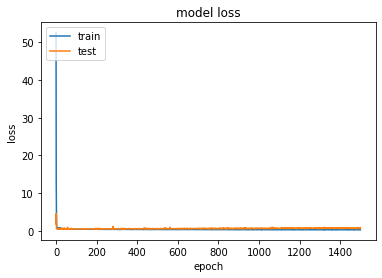

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

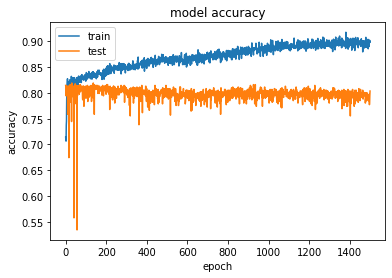

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
from pycm import ConfusionMatrix
from sklearn.metrics import plot_confusion_matrix, classification_report


print("Report : ", classification_report(y_test_encoded, y_pred_classes))

print(ConfusionMatrix(actual_vector=list(y_test_encoded),predict_vector=list(y_pred_classes)))

Report :                precision    recall  f1-score   support

           0       0.82      0.98      0.89       522
           1       0.33      0.05      0.09       120

    accuracy                           0.80       642
   macro avg       0.58      0.51      0.49       642
weighted avg       0.73      0.80      0.74       642

Predict   0         1         
Actual
0         510       12        

1         114       6         





Overall Statistics : 

95% CI                                                            (0.77302,0.83446)
ACC Macro                                                         0.80374
ARI                                                               0.03009
AUNP                                                              0.51351
AUNU                                                              0.51351
Bangdiwala B                                                      0.79337
Bennett S                                                         0.60748
CBA   